<a href="https://colab.research.google.com/github/koki-takada-1/machine-learning_summary/blob/main/dl_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("220516:AISD1:MNIST_CNN_Conv2Dが2段")
import datetime
print(datetime.datetime.now(),"MNIST" )

220516:AISD1:MNIST_CNN_Conv2Dが2段
2022-05-16 09:25:43.289473 MNIST


In [ ]:
'''初期設定、Google　Colabを準備し、
ランタイム/セッションの管理：　の全てを終了しておく
ランタイム/ランタイムのタイプを変更：　でハードウェアアクセラレータを「TPU」にする'''
#(1)
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
print('keras version ',keras.__version__)
print('tensorflow version=',tf.__version__)### for Python 2,3
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')
import os
import tensorflow_datasets as tfds
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

keras version  2.8.0
tensorflow version= 2.8.0
Running on TPU  ['10.34.225.234:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.34.225.234:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.34.225.234:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


11501568/11490434 [==============================] - 0s 0us/step


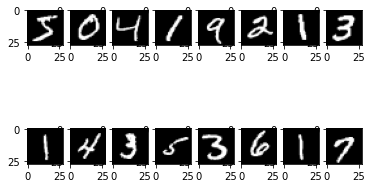

In [ ]:
#手書き数字データMNISTを読み込む
#(2)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 画像データ16件をキャンバスに2行8列で白黒で出力
for i in range(0, 16):
       plt.subplot(2, 8, i + 1)
       plt.imshow(x_train[i], cmap='gray')
plt.show()

In [ ]:
#学習用に、データの配列構造を変更する
#また、最大値255で割って最大値を1.0の実数にする正規化を行う
#(3)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0
print("len(x_train)=",len(x_train),"::len(x_test)=",len(x_test))
print("train.ndim=",x_train.ndim,"::test.ndim=",x_test.ndim)
print("train.size=",x_train.size,"::test.size=",x_test.size)
print("train.shape=",x_train.shape,"::test.shape=",x_test.shape)


len(x_train)= 60000 ::len(x_test)= 10000
train.ndim= 4 ::test.ndim= 4
train.size= 47040000 ::test.size= 7840000
train.shape= (60000, 28, 28, 1) ::test.shape= (10000, 28, 28, 1)


In [ ]:
'''以下の#(4)と#(4b)はモデルの設定を行っている
#(4)はMLP=Multi_Layer_Perceptron（多層パーセプトロン）で、ニューラルネットワークの層が複数あるものである
#(4b)はCNN=Convolutional Neural Network（畳み込みニューラルネットワーク）＝深層学習を行うものである
両方書いておいて、実行するときに(4)と(4b)のどちらか一方を行い、#(5)へ進む'''
#(4)(ここは、(4)か(4b)かのどちらかを行い、(5)へ進む：（４）はMLPの場合
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()



#(4b)(4bはCNNの場合
# A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))###(1))

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',##tf.keras.losses.BinaryCrossentropy(from_logits=True),##loss_fn,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)            

In [ ]:
#学習データを使って、ニューラルネットワークの学習を行う
#(5)：ここは、時間がかかる
epochs=2
result=model.fit(x_train, y_train,batch_size=128,verbose=1, epochs=epochs,validation_data=(x_test, y_test) )


Epoch 1/2
469/469 [==============================] - 14s 29ms/step - loss: 1.9168 - accuracy: 0.3463 - val_loss: 0.7042 - val_accuracy: 0.8421
Epoch 2/2
469/469 [==============================] - 12s 26ms/step - loss: 0.6724 - accuracy: 0.8097 - val_loss: 0.4012 - val_accuracy: 0.8988


313/313 [==============================] - 3s 10ms/step - loss: 0.4012 - accuracy: 0.8988


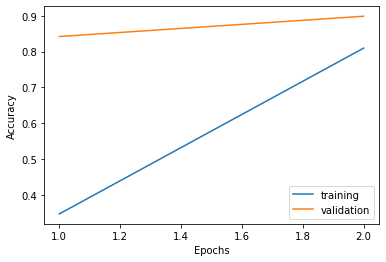

total 4732
drwxr-xr-x 1 root root    4096 May 16 09:41 .
drwxr-xr-x 1 root root    4096 May 16 09:11 ..
drwxr-xr-x 4 root root    4096 May  3 13:41 .config
-rw-r--r-- 1 root root 4826744 May 16 09:41 mymodel.h5
drwxr-xr-x 1 root root    4096 May  3 13:42 sample_data


In [ ]:
#(6)
model.evaluate(x_test, y_test)
#(6.5)
result.history.keys() # ヒストリデータのラベルを見てみる

#(6.6)
import matplotlib.pyplot as plt
%matplotlib inline
#epochs=1
plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#(7)
y_pred = tf.argmax(model.predict(x_test), axis=-1).numpy()
tf.math.confusion_matrix(y_test, y_pred)

#(8)
model.save("mymodel.h5")

#(9)ここにあるファイル"mymodel.hd5”は終了後消える。保存には更にダウンロードが必要
!ls -la

#(10)modelの再読み込み
model_2 = tf.keras.models.load_model("mymodel.h5")